In [1]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
matplotlib.rcParams.update({'font.size': 16})

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import lalsimulation as lalsim

In [3]:
import lalutils, rotations 

0.7371407732122977 1.2246467991473532e-16 -0.7853981633974483


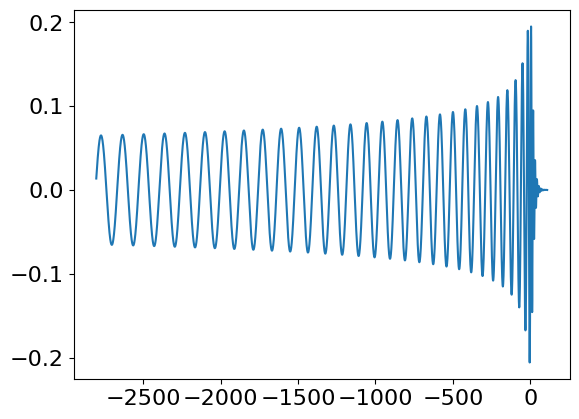

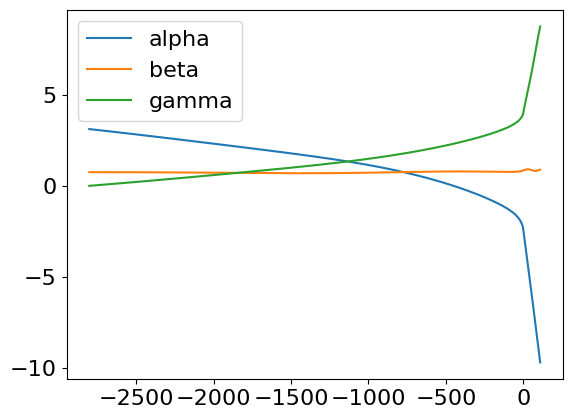

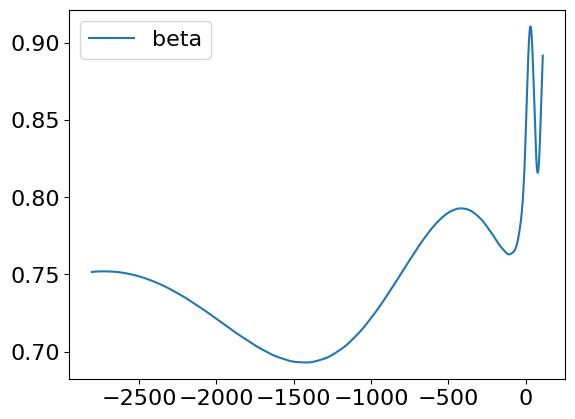

In [4]:
params = lalutils.gen_td_modes_wf_params(
    m1=100,
    m2=20,
    approximant=lalsim.SEOBNRv4PHM,
    S1x=0.5,
    S1y=0.5,
    S2x=0.5,
    S2y=0.5,
    f_min=12,
    f_ref=12,
    phiRef=1.2)

times, hlms = lalutils.gen_td_modes_wf(params, modes=[[2,2],[2,1]], eob_all_ell_2_modes=True, t_min=None, t_max=110)

thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

wr = rotations.WaveformRotations(
    times=times,
    hlms=hlms, 
    frame='inertial-L',
    alpha0=alpha0,
    thetaJN=thetaJN,
    phi0=phi_aligned) 

plt.figure()
plt.plot(wr.times, wr.hlms[2,2].real)

wr.from_inertial_frame_to_coprecessing_frame()


plt.figure()
plt.plot(wr.times, wr.hlms[2,2].real)

plt.figure()
plt.plot(wr.times, wr.alpha, label='alpha')
plt.plot(wr.times, wr.beta, label='beta')
plt.plot(wr.times, wr.gamma, label='gamma')
plt.legend()

plt.figure()
plt.plot(wr.times, wr.beta, label='beta')
plt.legend()

In [5]:
wr.hlms

{(2,
  2): array([ 1.36004949e-02+6.34881475e-02j,  1.47672346e-02+6.32279628e-02j,
         1.59289953e-02+6.29463402e-02j, ...,
        -4.04822147e-05-3.28400721e-05j, -4.49517429e-05-2.26717032e-05j,
        -4.70801236e-05-1.21566928e-05j]),
 (2,
  1): array([2.65239501e-03-3.63180433e-03j, 2.61885444e-03-3.65608042e-03j,
        2.58509269e-03-3.68004595e-03j, ...,
        6.70166297e-06-1.06987563e-05j, 4.43970990e-06-1.13504174e-05j,
        2.17706361e-06-1.15631748e-05j]),
 (2,
  0): array([ 2.16840434e-18-1.73472348e-18j, -2.60208521e-18+1.73472348e-18j,
        -7.83714239e-13-6.93889390e-18j, ...,
         1.52465931e-20+1.35525272e-20j,  9.31736242e-21+6.77626358e-21j,
        -5.08219768e-21+1.35525272e-20j]),
 (2,
  -1): array([2.65239501e-03+3.63180433e-03j, 2.61885444e-03+3.65608042e-03j,
        2.58509269e-03+3.68004595e-03j, ...,
        6.70166297e-06+1.06987563e-05j, 4.43970990e-06+1.13504174e-05j,
        2.17706361e-06+1.15631748e-05j]),
 (2,
  -2): array([ 1.3

In [6]:
data = lalutils.gen_td_coprec_data(
    params, modes=[[2,2],[2,1]], eob_all_ell_2_modes=True, t_min=None, t_max=100
)

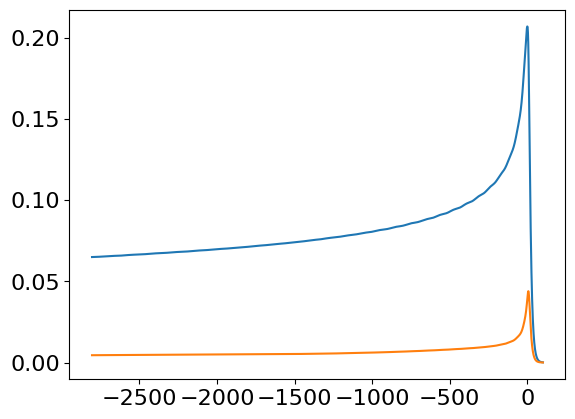

In [7]:
plt.plot(data['times'], data['amp_22'])
plt.plot(data['times'], data['amp_21'])

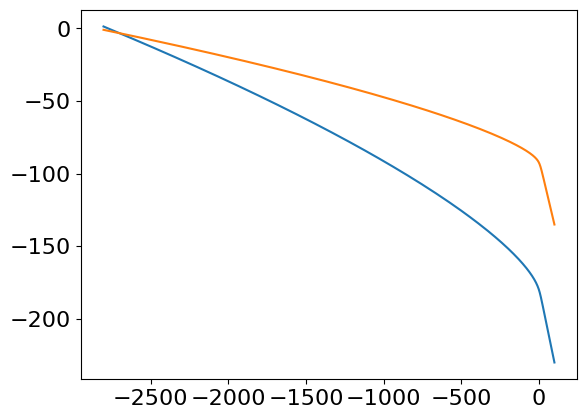

In [12]:
plt.plot(data['times'], data['phi_22'])
plt.plot(data['times'], data['phi_21'])


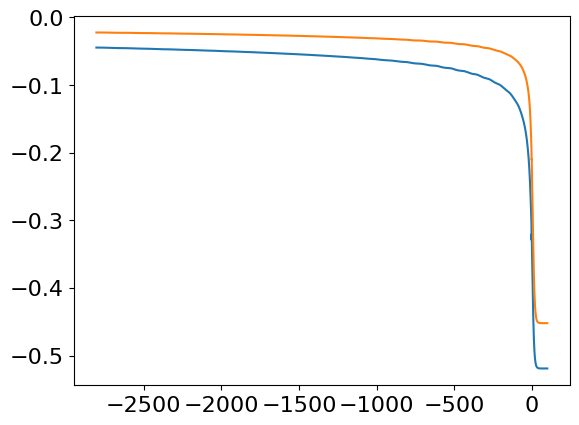

In [13]:
plt.plot(data['times'], data['freq_22'])
plt.plot(data['times'], data['freq_21'])
